In [1]:
path = "E:\student-mat.csv"

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(path)

In [4]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
#proximity meassures of binary attributes

In [8]:
df1 = df[['schoolsup','famsup','paid','activities','nursery','internet','romantic']]

In [9]:
df1.head()

,schoolsup,famsup,paid,activities,nursery,internet,romantic
0,yes,no,no,no,yes,no,no
1,no,yes,no,no,no,yes,no
2,yes,no,yes,no,yes,yes,no
3,no,yes,yes,yes,yes,yes,yes
4,no,yes,yes,no,yes,no,no


In [10]:
df1 = df1.replace('no',0)
df1 = df1.replace('yes',1)

In [11]:
df1

,schoolsup,famsup,paid,activities,nursery,internet,romantic
0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0
2,1,0,1,0,1,1,0
3,0,1,1,1,1,1,1
4,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...
390,0,1,1,0,1,0,0
391,0,0,0,0,0,1,0
392,0,0,0,0,0,0,0
393,0,0,0,0,0,1,0


In [12]:
df1.head()

,schoolsup,famsup,paid,activities,nursery,internet,romantic
0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0
2,1,0,1,0,1,1,0
3,0,1,1,1,1,1,1
4,0,1,1,0,1,0,0


In [13]:
n = np.array(df1[['schoolsup','famsup']])
n = n.reshape(-1,2)
n.shape

(395, 2)

In [17]:
m = np.array(df1[['internet','romantic']])
m = m.reshape(-1,2)
m.shape

(395, 2)

In [18]:
from scipy.spatial import distance

In [19]:
dist_matrix = distance.cdist(n,m)
print(dist_matrix)

[[0. 1. 1. ... 0. 1. 1.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 1. ... 0. 1. 1.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]]


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

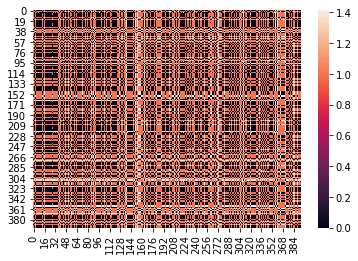

In [21]:
sns.heatmap(dist_matrix)

In [22]:
#nomoinal attribute

In [23]:
nominal = df[['Mjob','Fjob','reason','guardian']]
nominal = nominal.replace('at_home','home')
nominal = (nominal.astype('category'))

In [26]:
from sklearn.preprocessing import LavelEncoder

ImportError: cannot import name 'LavelEncoder' from 'sklearn.preprocessing' (C:\Users\amres\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [27]:
n = np.array(df1[['schoolsup','famsup']])
n = n.reshape(-1,2)
n.shape

(395, 2)

In [28]:
from sklearn.preprocessing import LavelEncoder

ImportError: cannot import name 'LavelEncoder' from 'sklearn.preprocessing' (C:\Users\amres\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [29]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=870ac2434173c5ecd0e41852e6059d585159a028c389a479f117ae3f64579515
  Stored in directory: c:\users\amres\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
lb = LabelEncoder()
nominal['Mjob'] = lb.fit_transform(nominal['Mjob'])
nominal['Fjob'] = lb.fit_transform(nominal['Fjob'])
nominal['reason'] = lb.fit_transform(nominal['reason'])
nominal['guardian'] = lb.fit_transform(nominal['guardian'])

In [32]:
nominal.head()

,Mjob,Fjob,reason,guardian
0,1,4,0,1
1,1,2,0,0
2,1,2,2,1
3,0,3,1,1
4,2,2,1,0


In [33]:
nominal1 = np.array(nominal)
nominal1.reshape(-1,2)
nominal2 = np.array(nominal)
nominal2.reshape(-1,2)

array([[1, 4],
       [0, 1],
       [1, 2],
       ...,
       [0, 1],
       [2, 1],
       [0, 0]])

In [34]:
from scipy.spatial import distance
dist_matrix = distance.cdist(nominal1,nominal2)
print(dist_matrix)

[[0.         2.23606798 2.82842712 ... 2.44948974 2.82842712 3.31662479]
 [2.23606798 0.         2.23606798 ... 2.23606798 2.23606798 1.41421356]
 [2.82842712 2.23606798 0.         ... 2.44948974 2.82842712 2.64575131]
 ...
 [2.44948974 2.23606798 2.44948974 ... 0.         1.41421356 2.23606798]
 [2.82842712 2.23606798 2.82842712 ... 1.41421356 0.         1.73205081]
 [3.31662479 1.41421356 2.64575131 ... 2.23606798 1.73205081 0.        ]]


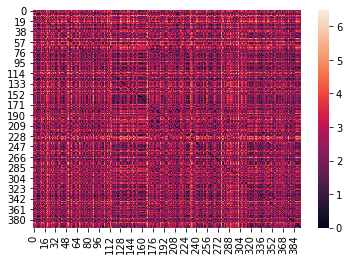

In [35]:
sns.heatmap(dist_matrix)
plt.show()